In [19]:
# 1. Création, paramétrage et ouverture du port série
import serial
import time

if 'ser' in locals(): ser.close()
ser = serial.Serial()
ser.baudrate = 9600 
ser.port = 'COM4' # 'COMx' sous windows Ou '/dev/tty.usbmodem1411' par exemple, sous MacOS et Linux
ser.open()
ser.is_open
time.sleep(5)# Attendre que le boot arduino soit terminé
dataFile = open("data.txt","w+")  # Création du fichier de données
valueArray = []
timeArray = []

In [20]:
# 2. Lecture et conversion de dix valeurs consécutives avant fermeture du port
n = 0

while(n < 10):
    valueString = ser.readline() # Lecture d'une valeur brute
    value = int(valueString.strip()) # Suppresion des CR/LF
    value = 5.0/1024.0*value # Conversion de la valeur brute en volt
    value = (value - 0.75)/0.01 + 25 # Conversion des volts en °C
    print(value) # Affichage de la valeur
    n = n + 1 # Comptage du nombre de valeurs affichées
    dataFile.write(str(value) + "\n") # Ecriture de la valeur courante dans le fichier
    valueArray.append(value)
    timeArray.append(n)
    
ser.close() # Fermeture du port série
dataFile.close() # Fermeture du fichier

19.82421875
19.82421875
19.82421875
19.82421875
19.82421875
19.3359375
19.82421875
19.82421875
19.3359375
19.82421875


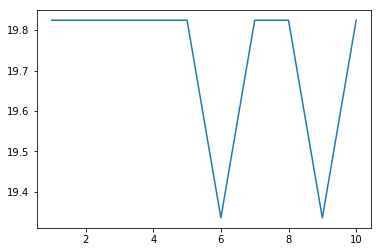

In [21]:
from pylab import *
plot(timeArray, valueArray)